# DICIONÁRIO DAS VARIÁVEIS

| Coluna | Descrição | Possíveis Valores |
| --- | --- | --- |
| PassengeId(Id do passageiro) | Código identificador de cada passageiro |  |
| Survived(Sobreviveu) | Se aquele passageiro sobreviveu ou não | 0 = não, 1 = sim |
| Pclass(Tipo de Classe)| Classe do ingresso | 1 = primeira, 2 = segunda, 3 = terceira |
| Sex(Sexo) | Sexo do passageiro | Female = feminino, male = masculino |
| Age(Idade) | Idade do passageiro |  |
| Sibsp(Quantidade de irmãos e cônjuges) | Quantidade de irmãos e cônjuge do passageiro a bordo |  |
| Parch(Quantidade de pais e crianças) | Quantidade de pais e filhos do passageiro a bordo |  |
| Ticket(Número do bilhete) | Número do bilhete do passageiro |  |
| Fare(Tarifa/valor pago) | Valor do bilhete do passageiro |  |
| Cabin(Cabine) | Número da cabine do passageiro |  |
| Embarked(Embarque) | Porto de embarque do passageiro | C = Cherbourg, Q = Queenstown, S = Southampton |

# PACOTES

In [1]:
# Manipulação de dados
import pandas as pd

# Algebra linear e estatística
import numpy as np
import statistics as stc

# Visualização gráfica dos dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
from yellowbrick.model_selection import FeatureImportances

# Preprocessing
#from sklearn.preprocessing import (LabelEncoder,OneHotEncoder)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Algorítimos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


# DATASETS

In [2]:
train = pd.read_csv('train.csv') # treino
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
np.unique(train['Survived'], return_counts=True)  #verificar a possibilidade de balancear os registros

(array([0, 1]), array([549, 342]))

In [4]:
test = pd.read_csv('test.csv') # teste
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# WRANGLING

In [5]:
# Traduzindo as variáveis
def traduz_colunas(df):
    df.columns = df.columns.str.lower()
    colunas_br = {
        'passengerid' : 'id_passageiro',
        'pclass' : 'classe_bilhete',
        'survived' : 'sobreviveu',
        'name' : 'nome',
        'sex' : 'sexo',
        'age' : 'idade',
        'sibsp' : 'irmaos_conjuges',
        'parch' : 'pais_criancas',
        'ticket' : 'numero_bilhete',
        'fare' : 'valor_bilhete',
        'cabin' : 'cabine',
        'embarked' : 'embarque'
    }

    return df.rename(columns=colunas_br)

In [6]:
# Gerando um novo dataset de treino
treino = traduz_colunas(train)
treino.head()

,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Gerando um novo dataset de teste
teste = traduz_colunas(test)
teste.head()

,id_passageiro,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# ANÁLISE DE DADOS

In [8]:
print('\nCOLUNAS NUMÉRICAS:')
display(treino.describe())

print('\nCOLUNAS NÃO NUMÉRICAS:')
display(treino.describe(include=['O']))


COLUNAS NUMÉRICAS:


,id_passageiro,sobreviveu,classe_bilhete,idade,irmaos_conjuges,pais_criancas,valor_bilhete
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



COLUNAS NÃO NUMÉRICAS:


,nome,sexo,numero_bilhete,cabine,embarque
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_passageiro    891 non-null    int64  
 1   sobreviveu       891 non-null    int64  
 2   classe_bilhete   891 non-null    int64  
 3   nome             891 non-null    object 
 4   sexo             891 non-null    object 
 5   idade            714 non-null    float64
 6   irmaos_conjuges  891 non-null    int64  
 7   pais_criancas    891 non-null    int64  
 8   numero_bilhete   891 non-null    object 
 9   valor_bilhete    891 non-null    float64
 10  cabine           204 non-null    object 
 11  embarque         889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_passageiro    418 non-null    int64  
 1   classe_bilhete   418 non-null    int64  
 2   nome             418 non-null    object 
 3   sexo             418 non-null    object 
 4   idade            332 non-null    float64
 5   irmaos_conjuges  418 non-null    int64  
 6   pais_criancas    418 non-null    int64  
 7   numero_bilhete   418 non-null    object 
 8   valor_bilhete    417 non-null    float64
 9   cabine           91 non-null     object 
 10  embarque         418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
treino.value_counts()

id_passageiro  sobreviveu  classe_bilhete  nome                                                  sexo    idade  irmaos_conjuges  pais_criancas  numero_bilhete  valor_bilhete  cabine  embarque
2              1           1               Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0   1                0              PC 17599        71.2833        C85     C           1
572            1           1               Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0   2                0              11769           51.4792        C101    S           1
578            1           1               Silvey, Mrs. William Baird (Alice Munger)             female  39.0   1                0              13507           55.9000        E44     S           1
582            1           1               Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0   1                1              17421           110.8833       C68     C           1
584            0    

# ANÁLISE GRÁFICA

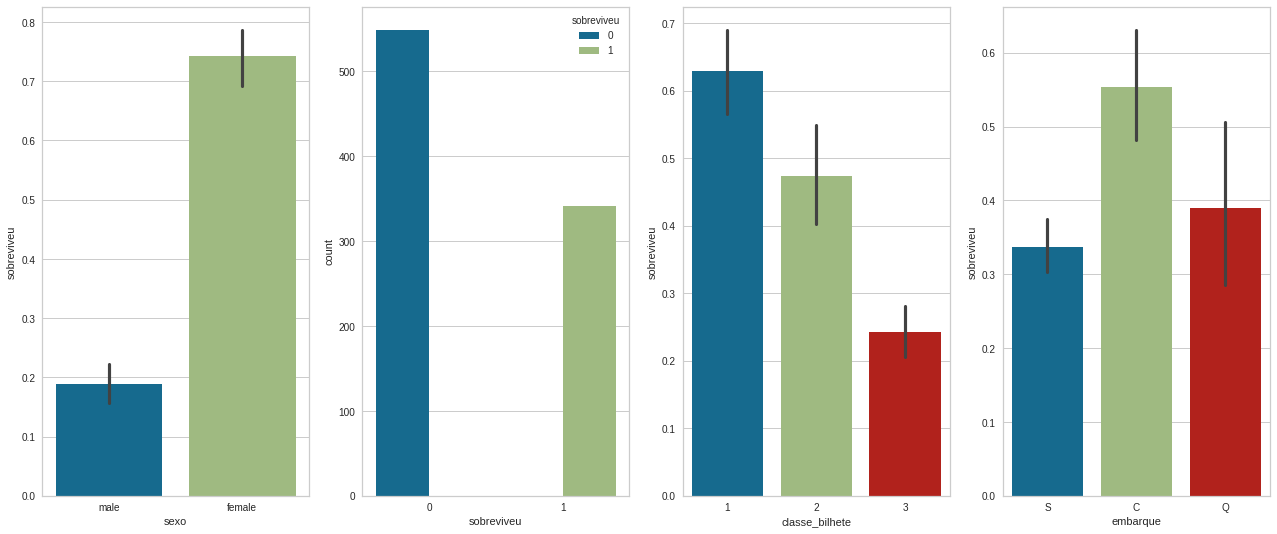

In [12]:
# Descritiva gráfica para avaliar as relações de sobrevivência

fig, (axis1, axis2, axis3, axis4) = plt.subplots(1,4, figsize=(22,9))

sns.barplot(x='sexo', y='sobreviveu', data=treino, ax=axis1)
sns.countplot(x='sobreviveu', hue='sobreviveu', data=treino, ax=axis2)  # 0 = NÃO e 1 = Sim
sns.barplot(x='classe_bilhete', y='sobreviveu', data=treino, ax=axis3)
sns.barplot(x='embarque', y='sobreviveu', data=treino, ax=axis4);

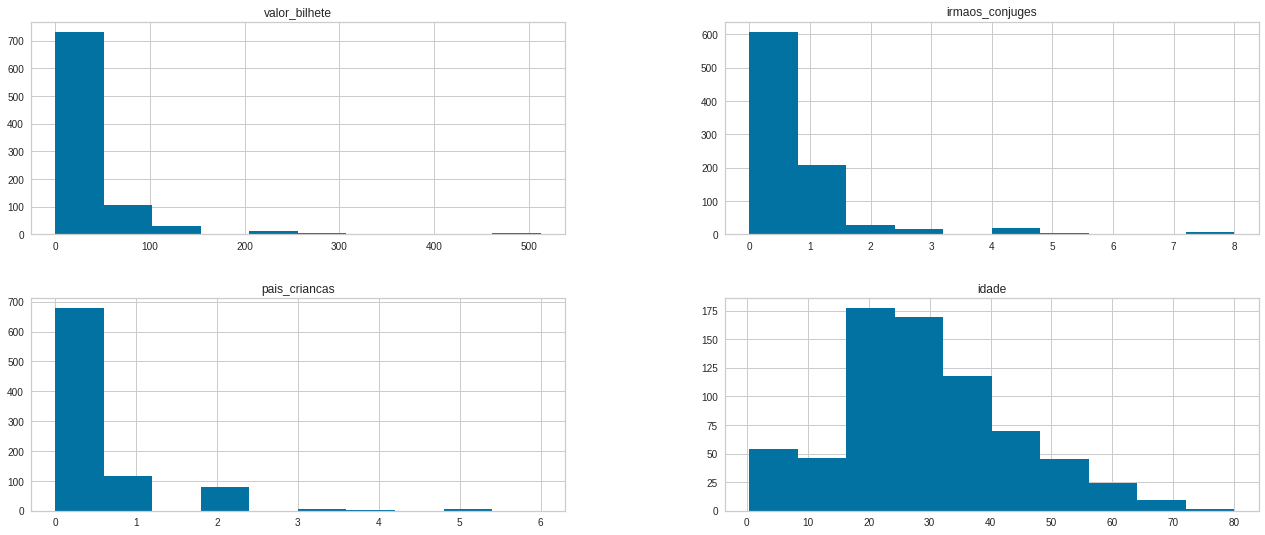

In [13]:
treino[['valor_bilhete','irmaos_conjuges', 'pais_criancas', 'idade']].hist(figsize=(22,9));

In [14]:
# Sobreviventes e não sobreviventes correlacionados com idade, embarque, sexo e classe do bilhete
grafico = px.scatter_matrix(treino, dimensions=['idade', 'embarque', 'sexo', 'classe_bilhete'], color = 'sobreviveu')
grafico.show() # Não temos valores inconsistentes

In [15]:
# Idade x Sobrevivente
aux = treino.value_counts(['idade', 'sobreviveu']).reset_index()
aux.columns = ['idade', 'sobreviveu', 'frequencia']
fig = px.histogram(aux, x="idade", y='frequencia', color="sobreviveu", nbins=len(aux['idade'].unique()),
                  title='<b>Distribuição</b> da Idade vs Sobrevivência')

fig.update_traces(hovertemplate='Sobreviveu: Não<br>Idade: %{x}<br>Frequência: %{y}', selector={'name':'0'})
fig.update_traces(hovertemplate='Sobreviveu: Sim<br>Idade: %{x}<br>Frequência: %{y}', selector={'name':'1'})

fig.update_yaxes(title="Frequência")
fig.update_xaxes(title="Idade")
fig.update_layout(
    template = 'plotly_white',
    autosize = False,
    width = 1400,
    height = 600)

fig.show()

sobreviveu,0,1
sexo,,
female,81,233
male,468,109


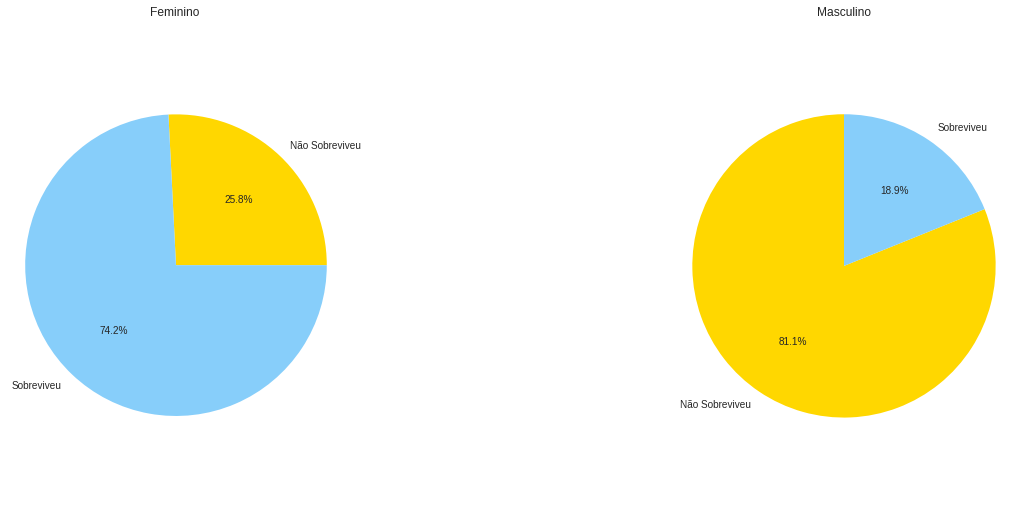

In [16]:
# Descritiva gráfica para saber a porcentagem de sobrevivência e morte

tabela = pd.pivot_table(data=treino, values='id_passageiro', index='sexo', columns='sobreviveu', aggfunc='count')
display(tabela) # 0 = NÃO e 1 = Sim

# Criar os arrays com os valores de sobrevivência e não sobrevivência por sexo
pie_female = tabela.loc['female']
pie_male = tabela.loc['male']

# Criando a figura com uma linha e duas colunas. Figsize define o tamanho da figura
fig, eixos = plt.subplots(nrows=1, ncols=2, figsize=(18,9))
# Criando o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos[0].pie(pie_female, labels=['Não Sobreviveu','Sobreviveu'],
                    autopct='%1.1f%%',  colors=['gold','lightskyblue'])
# Define o título pie_1 do gráfico
eixos[0].set_title('Feminino')
# Deixa os dois eixos iguais, fazendo com que o gráfico mantenha-se redondo
eixos[0].axis('equal')
# Criando o gráfico de pizza na segunda posição com as configurações definidas
pie_2 = eixos[1].pie(pie_male, labels=['Não Sobreviveu','Sobreviveu'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
# Define o título pie_2 do gráfico
eixos[1].set_title('Masculino')
plt.axis('equal')
# Ajusta o espaço entre os dois gráficos
plt.subplots_adjust(wspace=1)
plt.show()

In [17]:
# Gráfico de Dispersão para saber a relação do Valor Pago e a Idade
scatter_plot = sns.scatterplot(data=treino, x='idade', y='valor_bilhete', ax=axis1, alpha=0.9, hue= treino['sexo'], 
                               c=treino['valor_bilhete']) # Mudar a cor de acordo com o ticket
scatter_plot

In [18]:
# Correlação
corr = treino.corr()
z_values = abs(corr.values)
z_text = np.around(z_values, decimals=2)
fig = ff.create_annotated_heatmap(z=z_values,
                                  x=list(corr.index),
                                  y=list(corr.columns),
                                  annotation_text=z_text,
                                  hoverinfo='x+y+z',
                                  showscale=True)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 10

fig.update_layout(
    template = 'plotly_white',
    autosize = False,
    width = 1400,
    height = 600)

fig.show()

# PRÉ-PROCESSAMENTO DOS DADOS

# TRATANDO VALORES FALTANTES

In [19]:
# Ver a porcentagem dos valores faltantes do dataset train
(treino.isnull().sum() / treino.shape[0]).sort_values(ascending=False) * 100 

cabine             77.104377
idade              19.865320
embarque            0.224467
id_passageiro       0.000000
sobreviveu          0.000000
classe_bilhete      0.000000
nome                0.000000
sexo                0.000000
irmaos_conjuges     0.000000
pais_criancas       0.000000
numero_bilhete      0.000000
valor_bilhete       0.000000
dtype: float64

In [20]:
# Ver a porcentagem dos valores faltantes do dataset test
(teste.isnull().sum() / teste.shape[0]).sort_values(ascending=False) * 100 

cabine             78.229665
idade              20.574163
valor_bilhete       0.239234
id_passageiro       0.000000
classe_bilhete      0.000000
nome                0.000000
sexo                0.000000
irmaos_conjuges     0.000000
pais_criancas       0.000000
numero_bilhete      0.000000
embarque            0.000000
dtype: float64

In [21]:
# Valores nulos no dataset train
treino.isnull().sum()

id_passageiro        0
sobreviveu           0
classe_bilhete       0
nome                 0
sexo                 0
idade              177
irmaos_conjuges      0
pais_criancas        0
numero_bilhete       0
valor_bilhete        0
cabine             687
embarque             2
dtype: int64

In [22]:
# Analisando os NaN's 'embarque' do dataset treino
treino.loc[pd.isnull(treino['embarque'])]

,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [23]:
# Analisar relação 'cabine' e 'embarque'
treino['cabine']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: cabine, Length: 891, dtype: object

In [24]:
# Uma pessoa nessa cabine
display(treino.loc[treino['cabine'] == 'C85' ])

# Mesma família
print('\nMesma Família: ')
display(treino.loc[treino['cabine'] == 'C123' ])

# Uma pessoa nessa cabine
display(treino.loc[treino['cabine'] == 'B42' ])

# Famílias diferentes 
print('\nFamília Diferente: ')
display(treino.loc[treino['cabine'] == 'B28' ])

,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C



Mesma Família: 


,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S


,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S



Família Diferente: 


,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [25]:
# Verificando a frequência
treino['embarque'].value_counts()

S    644
C    168
Q     77
Name: embarque, dtype: int64

In [26]:
# Gerando uma função estatística de moda
moda = stc.mode(treino['embarque'])
print(moda)

S


In [27]:
# Incluindo a frequência nos dois valores faltantes
treino['embarque'].fillna(moda, inplace = True) # fillna = (fill = preencher) + (na = valor nulo) e inplace = True -> serve pra alterar a base de dados
treino.isnull().sum()

id_passageiro        0
sobreviveu           0
classe_bilhete       0
nome                 0
sexo                 0
idade              177
irmaos_conjuges      0
pais_criancas        0
numero_bilhete       0
valor_bilhete        0
cabine             687
embarque             0
dtype: int64

In [28]:
teste.isnull().sum()

id_passageiro        0
classe_bilhete       0
nome                 0
sexo                 0
idade               86
irmaos_conjuges      0
pais_criancas        0
numero_bilhete       0
valor_bilhete        1
cabine             327
embarque             0
dtype: int64

# MERGE

In [29]:
# Para acelerar a manipulação achei melhor juntar as tabelas
# Criando uma coluna para identificar se o dado é da tabela treino ou da tabela teste 

# Definir merge_log como TRUE se o elemento for do dataset "treino"
treino['merge_log'] = True  # É do conjunto do dataset treino? SIM

# Definir merge_log como FALSE se o elemento for do dataset teste
teste['merge_log'] = False  # É do conjunto treino? NÃO. Então é do conjunto teste

In [30]:
print('\nTreino: ')
display(treino.head(1))
print('\nTeste:')
display(teste.head(1))


Treino: 


,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque,merge_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,True



Teste:


,id_passageiro,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque,merge_log
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False


In [31]:
# Gerando uma dataframe de nome titanic_df para o Merge
titanic_df = pd.merge(treino, teste, how = 'outer')
titanic_df

,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque,merge_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,False
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,False
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,False


In [32]:
# Mudando os valores da variável 'sobreviveu' para inteiro e os NaN's para zero.
titanic_df['sobreviveu'] = titanic_df['sobreviveu'].fillna(0).astype(int)
titanic_df

,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque,merge_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,False
1305,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,False
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,False


In [33]:
# Colunas numéricas
print('\nCOLUNAS NUMÉRICAS:')
display(titanic_df.describe())
# Colunas não numéricas
print('\nCOLUNAS NÃO NUMÉRICAS:')
display(titanic_df.describe(include=['O']))


COLUNAS NUMÉRICAS:


,id_passageiro,sobreviveu,classe_bilhete,idade,irmaos_conjuges,pais_criancas,valor_bilhete
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.261268,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.439494,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200



COLUNAS NÃO NUMÉRICAS:


,nome,sexo,numero_bilhete,cabine,embarque
count,1309,1309,1309,295,1309
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,916


# VOLTANDO AO TRATAMENTO DE VALORES FALTANTES

In [34]:
# Tirando a mediana das idades da tabela titanic_df
# Mediana para evitar outliers já que existe um senhor de 80 anos de idade 
mediana = titanic_df['idade'].median()
print(mediana)

28.0


In [35]:
# Colocando a mediana no lugar dos NaN's
titanic_df['idade'].fillna(mediana, inplace = True) # fillna = (fill = preencher) + (na = valor nulo) e inplace = True -> serve pra alterar a base de dados
titanic_df.isnull().sum()

id_passageiro         0
sobreviveu            0
classe_bilhete        0
nome                  0
sexo                  0
idade                 0
irmaos_conjuges       0
pais_criancas         0
numero_bilhete        0
valor_bilhete         1
cabine             1014
embarque              0
merge_log             0
dtype: int64

In [36]:
# Analisando o 'valor_bilhete' 
display(titanic_df.loc[pd.isnull(titanic_df['valor_bilhete'])])

# Tirando a mediana do 'valor_bilhete'
mediana_valor_bilhete = titanic_df['valor_bilhete'].median()
print('\nMediana: ')
display(mediana_valor_bilhete)

,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,irmaos_conjuges,pais_criancas,numero_bilhete,valor_bilhete,cabine,embarque,merge_log
1043,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,False



Mediana: 


14.4542

In [37]:
# Colocando a mediana no lugar dos NaN's
print('\nNaNs: ')
titanic_df['valor_bilhete'].fillna(mediana_valor_bilhete, inplace = True) # fillna = (fill = preencher) + (na = valor nulo) e inplace = True -> serve pra alterar a base de dados
display(titanic_df.isnull().sum())


NaNs: 


id_passageiro         0
sobreviveu            0
classe_bilhete        0
nome                  0
sexo                  0
idade                 0
irmaos_conjuges       0
pais_criancas         0
numero_bilhete        0
valor_bilhete         0
cabine             1014
embarque              0
merge_log             0
dtype: int64

In [38]:
display(titanic_df['cabine'].value_counts())

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: cabine, Length: 186, dtype: int64

# PRÉ-PROCESSAMENTO DE DADOS

# LABEL-ENCODING

Engenharia de dados


QUANTIDADE
   familia  sobreviveu
3        3    0.488372
1        1    0.378723
2        2    0.371069
6        6    0.250000
0        0    0.206329
4        4    0.136364
5        5    0.120000
7        7    0.000000
8       10    0.000000

GRÁFICO


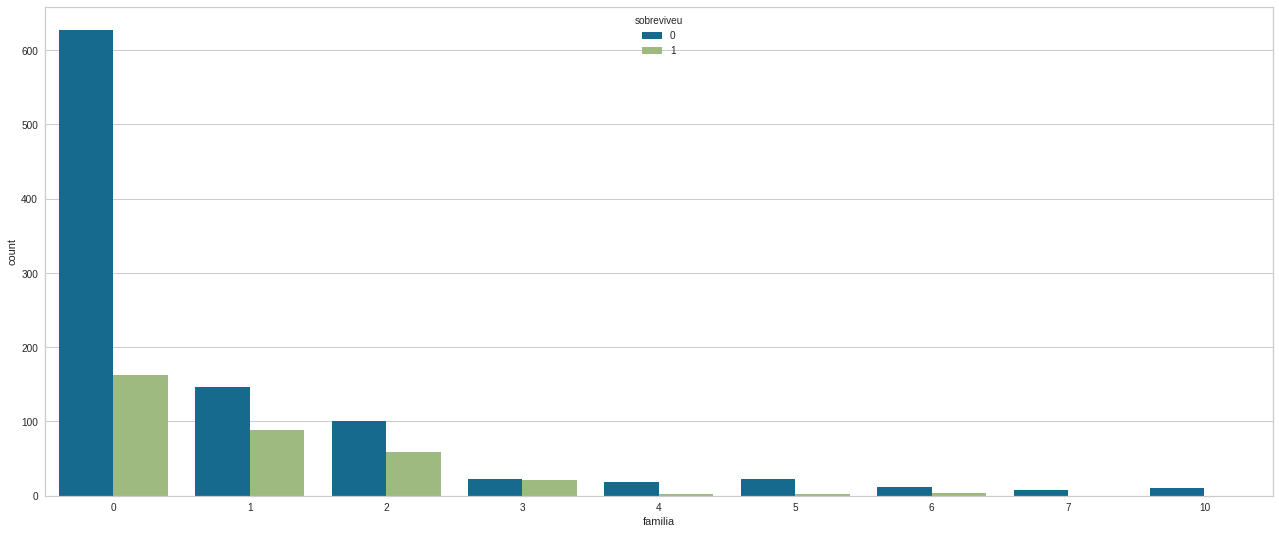

In [39]:
# Juntar 'irmaos_conjuges' e 'pais_criancas' em uma coluna com nome 'familia'
titanic_df['familia'] = titanic_df['irmaos_conjuges'] + titanic_df['pais_criancas']
# Apagando as colunas 'irmaos_conjuges' e 'pais_criancas'
titanic_df = titanic_df.drop(columns=['irmaos_conjuges', 'pais_criancas']) 
titanic_df.head()

print('\nQUANTIDADE')
print(titanic_df[['familia', 'sobreviveu']].groupby(['familia'], as_index=False).mean().sort_values(by='sobreviveu', ascending=False))
print('\nGRÁFICO')
fig, (axis1) = plt.subplots(1, figsize=(22,9))
sns.countplot(x='familia',hue='sobreviveu', data=titanic_df, ax=axis1)  # 0=Não , 1=Sim


In [40]:
# Como a localização das pessoas nas cabines podem influenciar na sobrevivência, vamos tratar os NaN's ao invés de excluí-las
# Mudando os valores NaN's para U (desconhecidos) e criando uma coluna com o nome 'convés' pela ordem alfabética para substituir as 'cabines'

print('\nINCLUINDO CONVÉS: ')
titanic_df['conves'] = titanic_df['cabine'].apply(lambda x: x[0] if pd.notnull(x) else 'U')
display(titanic_df.head())

# Nova coluna 'convés'
print('\nCONVES: ')
display(titanic_df['conves'].value_counts())

# Excluindo coluna 'cabine'
print('\nTABELA ATUAL: ')
titanic_df.drop(['cabine'], axis=1, inplace=True) # fillna = (fill = preencher) + (na = valor nulo) e inplace = True -> serve pra alterar a base de dados
titanic_df.isnull().sum()


INCLUINDO CONVÉS: 


,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,numero_bilhete,valor_bilhete,cabine,embarque,merge_log,familia,conves
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,True,1,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,True,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,True,0,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,True,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,True,0,U



CONVES: 


U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: conves, dtype: int64


TABELA ATUAL: 


id_passageiro     0
sobreviveu        0
classe_bilhete    0
nome              0
sexo              0
idade             0
numero_bilhete    0
valor_bilhete     0
embarque          0
merge_log         0
familia           0
conves            0
dtype: int64

In [41]:
# Os algorítimos preditivos tem melhor resultado com variáveis numéricas, então irei passar os valores categóricos para numéricos
# e de preferência para inteiro

# convertendo 'sexo' em masculino = 0 e feminino = 1
titanic_df['sexo'] = titanic_df['sexo'].map({'male': 0, 'female': 1})
titanic_df

,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,numero_bilhete,valor_bilhete,embarque,merge_log,familia,conves
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,S,True,1,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C,True,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,S,True,0,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,S,True,1,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,S,True,0,U
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,28.0,A.5. 3236,8.0500,S,False,0,U
1305,1306,0,1,"Oliva y Ocana, Dona. Fermina",1,39.0,PC 17758,108.9000,C,False,0,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,SOTON/O.Q. 3101262,7.2500,S,False,0,U
1307,1308,0,3,"Ware, Mr. Frederick",0,28.0,359309,8.0500,S,False,0,U


In [42]:
# Transformando a variável 'Embarked' em numérico
local_embarque = {"S": 0, "C": 1, "Q": 2}
data = [titanic_df]

for dataset in data:
    dataset['embarque'] = dataset['embarque'].map(local_embarque)

titanic_df

,id_passageiro,sobreviveu,classe_bilhete,nome,sexo,idade,numero_bilhete,valor_bilhete,embarque,merge_log,familia,conves
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,0,True,1,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,1,True,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,0,True,0,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,0,True,1,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,0,True,0,U
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,28.0,A.5. 3236,8.0500,0,False,0,U
1305,1306,0,1,"Oliva y Ocana, Dona. Fermina",1,39.0,PC 17758,108.9000,1,False,0,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,SOTON/O.Q. 3101262,7.2500,0,False,0,U
1307,1308,0,3,"Ware, Mr. Frederick",0,28.0,359309,8.0500,0,False,0,U



          M    F
sexo      0    1
titulo          
Master   61    0
Miss      0  264
Mr      757    0
Mrs       0  198
Rare     25    4

NÃO SOBREVIVENTES SOBREVIVENTES
sobreviveu    0    1
titulo              
Master       38   23
Miss        134  130
Mr          676   81
Mrs          98  100
Rare         21    8

QUANTIDADE
   titulo  sobreviveu
3     Mrs    0.505051
1    Miss    0.492424
0  Master    0.377049
4    Rare    0.275862
2      Mr    0.107001

GRÁFICO


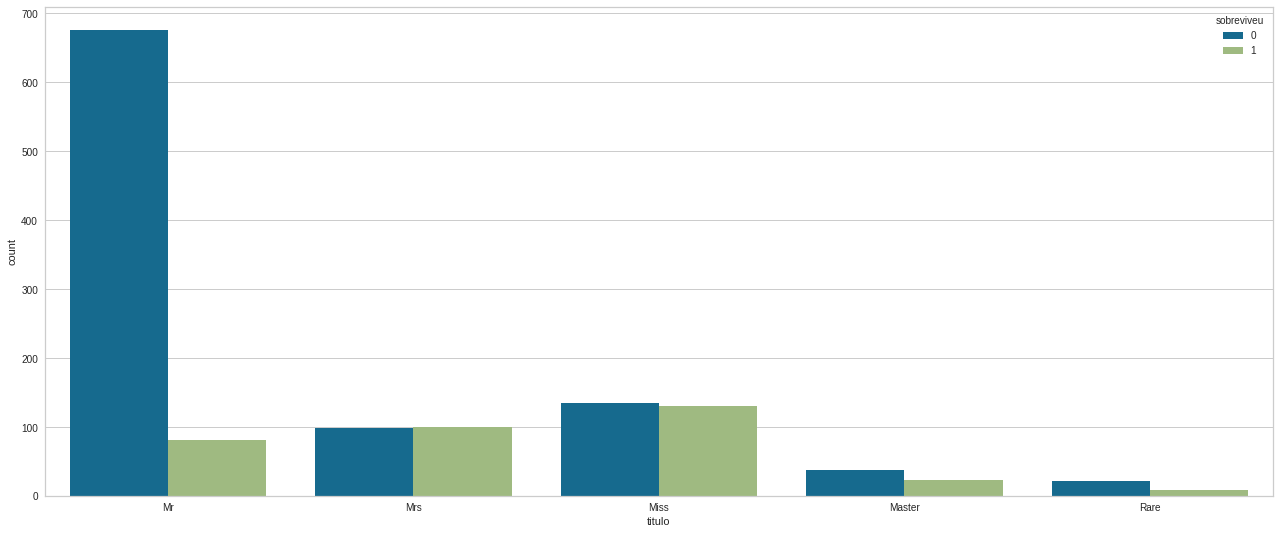

In [43]:
# Mudar os títulos dos nomes para números
data = [titanic_df]
titulos = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extraindo os titulos
    dataset['titulo'] = dataset.nome.str.extract(' ([A-Za-z]+)\.', expand=False)
    # substituindo títulos por um título mais comum e 'Rare' para os demais
    dataset['titulo'] = dataset['titulo'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['titulo'] = dataset['titulo'].replace('Mlle', 'Miss')
    dataset['titulo'] = dataset['titulo'].replace('Ms', 'Miss')
    dataset['titulo'] = dataset['titulo'].replace('Mme', 'Mrs')
    # correlação dos títulos em relação ao sexo onde masculino = 0 e feminino = 1
    print('\n          M    F')
    print(pd.crosstab(titanic_df['titulo'], titanic_df['sexo']))
    # Obs.: hipotese de que teve mais sobreviventes do título de Miss e Mrs do que Master e Mr, hava vista que, morreu mais do sexo masculino do que feminino.
    # porcentagem dos sobreviventes referente aos títulos
    print('\nNÃO SOBREVIVENTES SOBREVIVENTES')
    print(pd.crosstab(titanic_df['titulo'], titanic_df['sobreviveu']))
    print('\nQUANTIDADE')
    print(titanic_df[['titulo', 'sobreviveu']].groupby(['titulo'], as_index=False).mean().sort_values(by='sobreviveu', ascending=False))
    print('\nGRÁFICO')
    fig, ax1 = plt.subplots(figsize=(22, 9))
    sns.countplot(x='titulo',hue='sobreviveu', data=titanic_df, ax=ax1)  # 0=Não , 1=Sim
    # convertendo títulos em números
    dataset['titulo'] = dataset['titulo'].map(titulos)
    # Inserindo o 0 nos campos NaN 
    #dataset['titulo'] = dataset['titulo'].fillna(0)

In [44]:
# Excluindo a coluna 'Name'
titanic_df.drop(['nome'], axis=1, inplace=True) # axis=0 linhas e axis=1 colunas e inplace = serve pra alterar a base
titanic_df

,id_passageiro,sobreviveu,classe_bilhete,sexo,idade,numero_bilhete,valor_bilhete,embarque,merge_log,familia,conves,titulo
0,1,0,3,0,22.0,A/5 21171,7.2500,0,True,1,U,1
1,2,1,1,1,38.0,PC 17599,71.2833,1,True,1,C,3
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,0,True,0,U,2
3,4,1,1,1,35.0,113803,53.1000,0,True,1,C,3
4,5,0,3,0,35.0,373450,8.0500,0,True,0,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,0,28.0,A.5. 3236,8.0500,0,False,0,U,1
1305,1306,0,1,1,39.0,PC 17758,108.9000,1,False,0,C,5
1306,1307,0,3,0,38.5,SOTON/O.Q. 3101262,7.2500,0,False,0,U,1
1307,1308,0,3,0,28.0,359309,8.0500,0,False,0,U,1


In [45]:
titanic_df.loc[titanic_df['sobreviveu'] == 1.0 ].value_counts()

id_passageiro  sobreviveu  classe_bilhete  sexo  idade  numero_bilhete  valor_bilhete  embarque  merge_log  familia  conves  titulo
2              1           1               1     38.00  PC 17599        71.2833        1         True       1        C       3         1
574            1           3               1     28.00  14312           7.7500         2         True       0        U       2         1
592            1           1               1     52.00  36947           78.2667        1         True       1        D       3         1
588            1           1               0     60.00  13567           79.2000        1         True       2        B       1         1
586            1           1               1     18.00  110413          79.6500        0         True       2        E       2         1
                                                                                                                                      ..
307            1           1               1  

In [46]:
# Média e Mediana dos sobreviventes
# Quem pagou o valor mais alto teve mais probabilidade de sobrevivência
print('\nMédia: ')
print(titanic_df.loc[titanic_df['sobreviveu'] == 1.0 ].mean())
print('\nMediana: ')
print(titanic_df.loc[titanic_df['sobreviveu'] == 1.0 ].median())


Média: 
id_passageiro     444.368421
sobreviveu          1.000000
classe_bilhete      1.950292
sexo                0.681287
idade              28.291433
valor_bilhete      48.395408
embarque            0.447368
merge_log           1.000000
familia             0.938596
titulo              2.260234
dtype: float64

Mediana: 
id_passageiro     439.5
sobreviveu          1.0
classe_bilhete      2.0
sexo                1.0
idade              28.0
valor_bilhete      26.0
embarque            0.0
merge_log           1.0
familia             1.0
titulo              2.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [47]:
titanic_df.loc[titanic_df['sobreviveu'] == 0 ].value_counts()

id_passageiro  sobreviveu  classe_bilhete  sexo  idade  numero_bilhete  valor_bilhete  embarque  merge_log  familia  conves  titulo
1              0           3               0     22.0   A/5 21171       7.2500         0         True       1        U       1         1
948            0           3               0     35.0   349230          7.8958         0         False      0        U       1         1
980            0           3               1     28.0   364856          7.7500         2         False      0        U       2         1
981            0           2               0     2.0    29103           23.0000        0         False      2        U       4         1
982            0           3               1     22.0   347072          13.9000        0         False      1        U       3         1
                                                                                                                                      ..
535            0           3               1  

In [48]:
# Média e Mediana dos não sobreviventes 
# Quem pagou o valor mais baixo teve menos probabilidade de sobrevivência
print('\nMédia: ')
print(titanic_df.loc[titanic_df['sobreviveu'] == 0 ].mean())
print('\nMediana: ')
print(titanic_df.loc[titanic_df['sobreviveu'] == 0 ].median())


Média: 
id_passageiro     729.494312
sobreviveu          0.000000
classe_bilhete      2.416753
sexo                0.240951
idade              29.931748
valor_bilhete      27.935586
embarque            0.375388
merge_log           0.567735
familia             0.864529
titulo              1.546019
dtype: float64

Mediana: 
id_passageiro     790.0
sobreviveu          0.0
classe_bilhete      3.0
sexo                0.0
idade              28.0
valor_bilhete      13.0
embarque            0.0
merge_log           1.0
familia             0.0
titulo              1.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [49]:
# pd.cut vai ajudar a dividir as idades em categorias
pd.cut(titanic_df['idade'], 5).head() # 5 categorias

0    (16.136, 32.102]
1    (32.102, 48.068]
2    (16.136, 32.102]
3    (32.102, 48.068]
4    (32.102, 48.068]
Name: idade, dtype: category
Categories (5, interval[float64, right]): [(0.0902, 16.136] < (16.136, 32.102] < (32.102, 48.068] <
                                           (48.068, 64.034] < (64.034, 80.0]]

In [50]:
# Transformando a variável 'idade' em grupos e passando para categorias
data = [titanic_df]
for dataset in data:
    # Transformando 'idade' de float para int
    dataset['idade'] = dataset['idade'].astype(int)
    # Transformando as idades em grupos de 5 categorias
    dataset.loc[ dataset['idade'] <= 16.136, 'idade'] = 0
    dataset.loc[(dataset['idade'] > 16.136) & (dataset['idade'] <= 32.102), 'idade'] = 1
    dataset.loc[(dataset['idade'] > 32.102) & (dataset['idade'] <= 48.068), 'idade'] = 2
    dataset.loc[(dataset['idade'] > 48.068) & (dataset['idade'] <= 64.034), 'idade'] = 3
    dataset.loc[ dataset['idade'] > 64.034, 'idade'] = 4
    

titanic_df

,id_passageiro,sobreviveu,classe_bilhete,sexo,idade,numero_bilhete,valor_bilhete,embarque,merge_log,familia,conves,titulo
0,1,0,3,0,1,A/5 21171,7.2500,0,True,1,U,1
1,2,1,1,1,2,PC 17599,71.2833,1,True,1,C,3
2,3,1,3,1,1,STON/O2. 3101282,7.9250,0,True,0,U,2
3,4,1,1,1,2,113803,53.1000,0,True,1,C,3
4,5,0,3,0,2,373450,8.0500,0,True,0,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,0,1,A.5. 3236,8.0500,0,False,0,U,1
1305,1306,0,1,1,2,PC 17758,108.9000,1,False,0,C,5
1306,1307,0,3,0,2,SOTON/O.Q. 3101262,7.2500,0,False,0,U,1
1307,1308,0,3,0,1,359309,8.0500,0,False,0,U,1


In [51]:
# Excluindo a variável Ticket, ainda não entendi a referência para gerar uma relevância;
titanic_df.drop(['numero_bilhete'], axis=1, inplace=True) # axis=0 linhas e axis=1 colunas e inplace = serve pra alterar a base
titanic_df

,id_passageiro,sobreviveu,classe_bilhete,sexo,idade,valor_bilhete,embarque,merge_log,familia,conves,titulo
0,1,0,3,0,1,7.2500,0,True,1,U,1
1,2,1,1,1,2,71.2833,1,True,1,C,3
2,3,1,3,1,1,7.9250,0,True,0,U,2
3,4,1,1,1,2,53.1000,0,True,1,C,3
4,5,0,3,0,2,8.0500,0,True,0,U,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,0,1,8.0500,0,False,0,U,1
1305,1306,0,1,1,2,108.9000,1,False,0,C,5
1306,1307,0,3,0,2,7.2500,0,False,0,U,1
1307,1308,0,3,0,1,8.0500,0,False,0,U,1


In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_passageiro   1309 non-null   int64  
 1   sobreviveu      1309 non-null   int64  
 2   classe_bilhete  1309 non-null   int64  
 3   sexo            1309 non-null   int64  
 4   idade           1309 non-null   int64  
 5   valor_bilhete   1309 non-null   float64
 6   embarque        1309 non-null   int64  
 7   merge_log       1309 non-null   bool   
 8   familia         1309 non-null   int64  
 9   conves          1309 non-null   object 
 10  titulo          1309 non-null   int64  
dtypes: bool(1), float64(1), int64(8), object(1)
memory usage: 146.1+ KB


In [53]:
titanic_df['valor_bilhete'].count

<bound method Series.count of 0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: valor_bilhete, Length: 1309, dtype: float64>

In [54]:
# pd.cut vai ajudar a dividir os valores em categorias
pd.qcut(titanic_df['valor_bilhete'], q=4).head() # 4 categorias

0      (-0.001, 7.896]
1    (31.275, 512.329]
2      (7.896, 14.454]
3    (31.275, 512.329]
4      (7.896, 14.454]
Name: valor_bilhete, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] <
                                           (31.275, 512.329]]

In [55]:
# Transformando a variável Fare(Tarifa paga) da mesma forma que a variável 'idade'

data = [titanic_df]

for dataset in data:
    dataset.loc[ dataset['valor_bilhete'] <= 7.896, 'valor_bilhete'] = 0
    dataset.loc[(dataset['valor_bilhete'] > 7.896) & (dataset['valor_bilhete'] <= 14.454), 'valor_bilhete'] = 1
    dataset.loc[(dataset['valor_bilhete'] > 14.454) & (dataset['valor_bilhete'] <= 31.275), 'valor_bilhete'] = 2
    dataset.loc[ dataset['valor_bilhete'] > 31.275, 'valor_bilhete'] = 3
    dataset['valor_bilhete'] = dataset['valor_bilhete'].astype(int)

titanic_df

,id_passageiro,sobreviveu,classe_bilhete,sexo,idade,valor_bilhete,embarque,merge_log,familia,conves,titulo
0,1,0,3,0,1,0,0,True,1,U,1
1,2,1,1,1,2,3,1,True,1,C,3
2,3,1,3,1,1,1,0,True,0,U,2
3,4,1,1,1,2,3,0,True,1,C,3
4,5,0,3,0,2,1,0,True,0,U,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,0,1,1,0,False,0,U,1
1305,1306,0,1,1,2,3,1,False,0,C,5
1306,1307,0,3,0,2,0,0,False,0,U,1
1307,1308,0,3,0,1,1,0,False,0,U,1


# ONE-HOT-ENCODING

In [56]:
# Verificando a quantidade de categorias 
print('\nConves: ')
print(len(np.unique(titanic_df['conves'])))

print('\nClasse do Bilhete: ')
print(len(np.unique(titanic_df['classe_bilhete'])))

print('\nIdade: ')
print(len(np.unique(titanic_df['idade'])))

print('\nEmbarque: ')
print(len(np.unique(titanic_df['embarque'])))

print('\nValor do Bilhete: ')
print(len(np.unique(titanic_df['valor_bilhete'])))

print('\nTítulo: ')
print(len(np.unique(titanic_df['titulo'])))


Conves: 
9

Classe do Bilhete: 
3

Idade: 
5

Embarque: 
3

Valor do Bilhete: 
4

Título: 
5


In [57]:
# Fazendo One-hot-Encoding com pd.get_dummies
conves_dummies = pd.get_dummies(titanic_df['conves'], prefix='conves')
titanic_df = pd.concat([titanic_df, conves_dummies], axis=1)
titanic_df.drop(['conves'], axis=1, inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id_passageiro   1309 non-null   int64
 1   sobreviveu      1309 non-null   int64
 2   classe_bilhete  1309 non-null   int64
 3   sexo            1309 non-null   int64
 4   idade           1309 non-null   int64
 5   valor_bilhete   1309 non-null   int64
 6   embarque        1309 non-null   int64
 7   merge_log       1309 non-null   bool 
 8   familia         1309 non-null   int64
 9   titulo          1309 non-null   int64
 10  conves_A        1309 non-null   uint8
 11  conves_B        1309 non-null   uint8
 12  conves_C        1309 non-null   uint8
 13  conves_D        1309 non-null   uint8
 14  conves_E        1309 non-null   uint8
 15  conves_F        1309 non-null   uint8
 16  conves_G        1309 non-null   uint8
 17  conves_T        1309 non-null   uint8
 18  conves_U        1309 non-nul

In [58]:
# Fazendo One-hot-Encoding com pd.get_dummies
classe_bilhete_dummies = pd.get_dummies(titanic_df['classe_bilhete'], prefix='classe_bilhete')
titanic_df = pd.concat([titanic_df, classe_bilhete_dummies], axis=1)
titanic_df.drop(['classe_bilhete'], axis=1, inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id_passageiro     1309 non-null   int64
 1   sobreviveu        1309 non-null   int64
 2   sexo              1309 non-null   int64
 3   idade             1309 non-null   int64
 4   valor_bilhete     1309 non-null   int64
 5   embarque          1309 non-null   int64
 6   merge_log         1309 non-null   bool 
 7   familia           1309 non-null   int64
 8   titulo            1309 non-null   int64
 9   conves_A          1309 non-null   uint8
 10  conves_B          1309 non-null   uint8
 11  conves_C          1309 non-null   uint8
 12  conves_D          1309 non-null   uint8
 13  conves_E          1309 non-null   uint8
 14  conves_F          1309 non-null   uint8
 15  conves_G          1309 non-null   uint8
 16  conves_T          1309 non-null   uint8
 17  conves_U          1309 non-null  

In [59]:
# Fazendo One-hot-Encoding com pd.get_dummies
idade_dummies = pd.get_dummies(titanic_df['idade'], prefix='idade')
titanic_df = pd.concat([titanic_df, idade_dummies], axis=1)
titanic_df.drop(['idade'], axis=1, inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id_passageiro     1309 non-null   int64
 1   sobreviveu        1309 non-null   int64
 2   sexo              1309 non-null   int64
 3   valor_bilhete     1309 non-null   int64
 4   embarque          1309 non-null   int64
 5   merge_log         1309 non-null   bool 
 6   familia           1309 non-null   int64
 7   titulo            1309 non-null   int64
 8   conves_A          1309 non-null   uint8
 9   conves_B          1309 non-null   uint8
 10  conves_C          1309 non-null   uint8
 11  conves_D          1309 non-null   uint8
 12  conves_E          1309 non-null   uint8
 13  conves_F          1309 non-null   uint8
 14  conves_G          1309 non-null   uint8
 15  conves_T          1309 non-null   uint8
 16  conves_U          1309 non-null   uint8
 17  classe_bilhete_1  1309 non-null  

In [60]:
# Fazendo One-hot-Encoding com pd.get_dummies
embarque_dummies = pd.get_dummies(titanic_df['embarque'], prefix='embarque')
titanic_df = pd.concat([titanic_df, embarque_dummies], axis=1)
titanic_df.drop(['embarque'], axis=1, inplace=True)

#titanic_df.info()

In [61]:
# Fazendo One-hot-Encoding com pd.get_dummies
valor_bilhete_dummies = pd.get_dummies(titanic_df['valor_bilhete'], prefix='valor_bilhete')
titanic_df = pd.concat([titanic_df, valor_bilhete_dummies], axis=1)
titanic_df.drop(['valor_bilhete'], axis=1, inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id_passageiro     1309 non-null   int64
 1   sobreviveu        1309 non-null   int64
 2   sexo              1309 non-null   int64
 3   merge_log         1309 non-null   bool 
 4   familia           1309 non-null   int64
 5   titulo            1309 non-null   int64
 6   conves_A          1309 non-null   uint8
 7   conves_B          1309 non-null   uint8
 8   conves_C          1309 non-null   uint8
 9   conves_D          1309 non-null   uint8
 10  conves_E          1309 non-null   uint8
 11  conves_F          1309 non-null   uint8
 12  conves_G          1309 non-null   uint8
 13  conves_T          1309 non-null   uint8
 14  conves_U          1309 non-null   uint8
 15  classe_bilhete_1  1309 non-null   uint8
 16  classe_bilhete_2  1309 non-null   uint8
 17  classe_bilhete_3  1309 non-null  

In [62]:
# Fazendo One-hot-Encoding com pd.get_dummies
titulo_dummies = pd.get_dummies(titanic_df['titulo'], prefix='titulo')
titanic_df = pd.concat([titanic_df, titulo_dummies], axis=1)
titanic_df.drop(['titulo'], axis=1, inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id_passageiro     1309 non-null   int64
 1   sobreviveu        1309 non-null   int64
 2   sexo              1309 non-null   int64
 3   merge_log         1309 non-null   bool 
 4   familia           1309 non-null   int64
 5   conves_A          1309 non-null   uint8
 6   conves_B          1309 non-null   uint8
 7   conves_C          1309 non-null   uint8
 8   conves_D          1309 non-null   uint8
 9   conves_E          1309 non-null   uint8
 10  conves_F          1309 non-null   uint8
 11  conves_G          1309 non-null   uint8
 12  conves_T          1309 non-null   uint8
 13  conves_U          1309 non-null   uint8
 14  classe_bilhete_1  1309 non-null   uint8
 15  classe_bilhete_2  1309 non-null   uint8
 16  classe_bilhete_3  1309 non-null   uint8
 17  idade_0           1309 non-null  

CONSTRUINDO O MODELO

In [63]:
# Recolocando a variável treino = TRUE com todas as correções feitas
treino_df = titanic_df[titanic_df['merge_log'] == True]
treino_df

,id_passageiro,sobreviveu,sexo,merge_log,familia,conves_A,conves_B,conves_C,conves_D,conves_E,...,embarque_2,valor_bilhete_0,valor_bilhete_1,valor_bilhete_2,valor_bilhete_3,titulo_1,titulo_2,titulo_3,titulo_4,titulo_5
0,1,0,0,True,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2,1,1,True,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,1,1,True,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,4,1,1,True,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,5,0,0,True,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,True,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
887,888,1,1,True,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
888,889,0,1,True,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
889,890,1,0,True,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [64]:
# Excluindo a variável 'treino_log' que serviu apenas para diferenciar train e test

treino_df.drop(['merge_log'], axis=1, inplace=True) # axis=0 linhas e axis=1 colunas
treino_df

,id_passageiro,sobreviveu,sexo,familia,conves_A,conves_B,conves_C,conves_D,conves_E,conves_F,...,embarque_2,valor_bilhete_0,valor_bilhete_1,valor_bilhete_2,valor_bilhete_3,titulo_1,titulo_2,titulo_3,titulo_4,titulo_5
0,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2,1,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,4,1,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
887,888,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
888,889,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
889,890,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [65]:
treino_df.isnull().sum()

id_passageiro       0
sobreviveu          0
sexo                0
familia             0
conves_A            0
conves_B            0
conves_C            0
conves_D            0
conves_E            0
conves_F            0
conves_G            0
conves_T            0
conves_U            0
classe_bilhete_1    0
classe_bilhete_2    0
classe_bilhete_3    0
idade_0             0
idade_1             0
idade_2             0
idade_3             0
idade_4             0
embarque_0          0
embarque_1          0
embarque_2          0
valor_bilhete_0     0
valor_bilhete_1     0
valor_bilhete_2     0
valor_bilhete_3     0
titulo_1            0
titulo_2            0
titulo_3            0
titulo_4            0
titulo_5            0
dtype: int64

In [66]:
# Recolocando a variável teste = FALSE com todas as correções feitas

teste_df = titanic_df[titanic_df['merge_log'] == False]
teste_df

,id_passageiro,sobreviveu,sexo,merge_log,familia,conves_A,conves_B,conves_C,conves_D,conves_E,...,embarque_2,valor_bilhete_0,valor_bilhete_1,valor_bilhete_2,valor_bilhete_3,titulo_1,titulo_2,titulo_3,titulo_4,titulo_5
891,892,0,0,False,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
892,893,0,1,False,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
893,894,0,0,False,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
894,895,0,0,False,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
895,896,0,1,False,2,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,0,False,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1305,1306,0,1,False,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1306,1307,0,0,False,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1307,1308,0,0,False,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [67]:
# Excluindo a variável 'Survived' que surgiu no momento do Merge
# Excluindo a variável 'treino_log' que serviu apenas para diferenciar train e test

teste_df.drop(['sobreviveu'], axis=1, inplace=True)

teste_df.drop(['merge_log'], axis=1, inplace=True) # axis=0 linhas e axis=1 colunas

teste_df

,id_passageiro,sexo,familia,conves_A,conves_B,conves_C,conves_D,conves_E,conves_F,conves_G,...,embarque_2,valor_bilhete_0,valor_bilhete_1,valor_bilhete_2,valor_bilhete_3,titulo_1,titulo_2,titulo_3,titulo_4,titulo_5
891,892,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
892,893,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
893,894,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
894,895,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
895,896,1,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1305,1306,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1306,1307,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1307,1308,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [68]:
treino_df.drop(['id_passageiro'], axis=1, inplace=True)
treino_df.isnull().sum()

sobreviveu          0
sexo                0
familia             0
conves_A            0
conves_B            0
conves_C            0
conves_D            0
conves_E            0
conves_F            0
conves_G            0
conves_T            0
conves_U            0
classe_bilhete_1    0
classe_bilhete_2    0
classe_bilhete_3    0
idade_0             0
idade_1             0
idade_2             0
idade_3             0
idade_4             0
embarque_0          0
embarque_1          0
embarque_2          0
valor_bilhete_0     0
valor_bilhete_1     0
valor_bilhete_2     0
valor_bilhete_3     0
titulo_1            0
titulo_2            0
titulo_3            0
titulo_4            0
titulo_5            0
dtype: int64

In [69]:
corr = treino_df.corr()
z_values = abs(corr.values)
z_text = np.around(z_values, decimals=2)

fig = ff.create_annotated_heatmap(z=z_values,
                                  x=list(corr.index),
                                  y=list(corr.columns),
                                  annotation_text=z_text,
                                  hoverinfo='x+y+z',
                                  showscale=True)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 10

fig.update_layout(
    template = 'plotly_white',
    autosize = False,
    width = 1300,
    height = 600)

fig.show()

In [70]:
treino_df

,sobreviveu,sexo,familia,conves_A,conves_B,conves_C,conves_D,conves_E,conves_F,conves_G,...,embarque_2,valor_bilhete_0,valor_bilhete_1,valor_bilhete_2,valor_bilhete_3,titulo_1,titulo_2,titulo_3,titulo_4,titulo_5
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
887,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
888,0,1,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
889,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [71]:
teste_df

,id_passageiro,sexo,familia,conves_A,conves_B,conves_C,conves_D,conves_E,conves_F,conves_G,...,embarque_2,valor_bilhete_0,valor_bilhete_1,valor_bilhete_2,valor_bilhete_3,titulo_1,titulo_2,titulo_3,titulo_4,titulo_5
891,892,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
892,893,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
893,894,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
894,895,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
895,896,1,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1305,1306,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1306,1307,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1307,1308,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [72]:
treino_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   sobreviveu        891 non-null    int64
 1   sexo              891 non-null    int64
 2   familia           891 non-null    int64
 3   conves_A          891 non-null    uint8
 4   conves_B          891 non-null    uint8
 5   conves_C          891 non-null    uint8
 6   conves_D          891 non-null    uint8
 7   conves_E          891 non-null    uint8
 8   conves_F          891 non-null    uint8
 9   conves_G          891 non-null    uint8
 10  conves_T          891 non-null    uint8
 11  conves_U          891 non-null    uint8
 12  classe_bilhete_1  891 non-null    uint8
 13  classe_bilhete_2  891 non-null    uint8
 14  classe_bilhete_3  891 non-null    uint8
 15  idade_0           891 non-null    uint8
 16  idade_1           891 non-null    uint8
 17  idade_2           891 non-null    u

# CRIANDO OS MODELOS DE MACHINE LEARNING

In [73]:
X = treino_df.drop("sobreviveu", axis=1)
y = treino_df["sobreviveu"]
X_teste = teste_df.drop("id_passageiro", axis=1).copy()
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_teste shape: ', X_teste.shape)

X shape:  (891, 31)
y shape:  (891,)
X_teste shape:  (418, 31)


# MODELOS DE AVALIAÇÃO 

In [74]:
# Armazenar as métricas de avaliação 
comparar_modelos = pd.DataFrame(columns=['Modelo', 'Acurácia'])

In [75]:
def comparar(Nome_do_modelo, valor_acuracia):  

  global comparar_modelos

  comparar_modelos = comparar_modelos.append({'Modelo': Nome_do_modelo, 'Acurácia': valor_acuracia }, ignore_index=True)


  #Colocando em ordem de melhor acurácia para a pior
  comparar_modelos.sort_values(ascending=False, by='Acurácia', inplace=True)

  comparar_modelos.drop_duplicates(inplace=True) # para caso duplicar uma linha sem querer

  display(comparar_modelos) 

In [76]:
# Repetir as amostragens 
SEED = 2135256
np.random.seed(SEED)

Balanceando as amostras com train_test_split

In [77]:
from sklearn.model_selection import train_test_split

X_treino, X_val, y_teste, y_val = train_test_split(X, y, test_size=0.30, stratify=None, random_state=SEED)
# verificando a divisão das amostras
print('X_treino shape: ', X_treino.shape)
print('y_teste shape: ', y_teste.shape)
print('X_val shape: ', X_val.shape)
print('y_val shape:', y_val.shape)

X_treino shape:  (623, 31)
y_teste shape:  (623,)
X_val shape:  (268, 31)
y_val shape: (268,)


Modelo Regressão Logística

In [78]:
#criando  o modelo de regressão logística
modelo_rl = LogisticRegression(max_iter=100,
                               fit_intercept=True,
                               intercept_scaling=1,
                               n_jobs=1,
                               random_state=SEED)

modelo_rl.fit(X_treino, y_teste)

#Gerando a previsão com os testes
y_pred_rl = modelo_rl.predict(X_val)

#verificando a acurácia do modelo
acuracia_rl = round(accuracy_score(y_val, y_pred_rl)*100,2)

display(f"A acurácia do modelo de Regressão Logística é de {acuracia_rl} %")

#Submetendo ao Kaggle
submissao_pred_rl = modelo_rl.predict(X_teste)

#Gerando submissão
submissao_rl = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                'Survived': submissao_pred_rl
                            })

#Gerando o arquivo CSV
#submissao_rl.to_csv('./submissao_rl.csv', index=False)

#Tabela de comparação
comparar('Regressão Logística', acuracia_rl)

'A acurácia do modelo de Regressão Logística é de 81.34 %'

,Modelo,Acurácia
0,Regressão Logística,81.34


Modelo Árvore de Decisão

In [111]:
#Criando o modelo
modelo_tree = DecisionTreeClassifier(max_depth=3,
                                     criterion='entropy',
                                     random_state=SEED)

modelo_tree.fit(X_treino, y_teste)

y_pred_tree = modelo_tree.predict(X_val)

#verificando a acurácia do modelo
acuracia_tree = round(accuracy_score(y_val, y_pred_tree)*100, 2)

display(f"A acurácia do modelo de Árvore de Classificação é de {acuracia_tree} %")

#Submetendo ao Kaggle
submissao_pred_tree = modelo_rl.predict(X_teste)

submissao_tree = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                  'Survived': submissao_pred_tree
                              })

#Gerando arquivo csv
#submissao_tree.to_csv('./submission_tree.csv', index=False)

#Tabela de comparação
comparar( "Árvore de Decisão", acuracia_tree)

'A acurácia do modelo de Árvore de Classificação é de 81.72 %'

,Modelo,Acurácia
0,SVC,82.46
1,Árvore de Decisão,81.72
2,XGB Classifier,81.72
3,Regressão Logística,81.34
4,Gradient Boosting,81.34
5,Cat Boost,80.97
6,Random Forest Classifier,80.97
7,KNeighbors Classifier,79.85
8,SGD,78.73
9,GNB,76.12


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



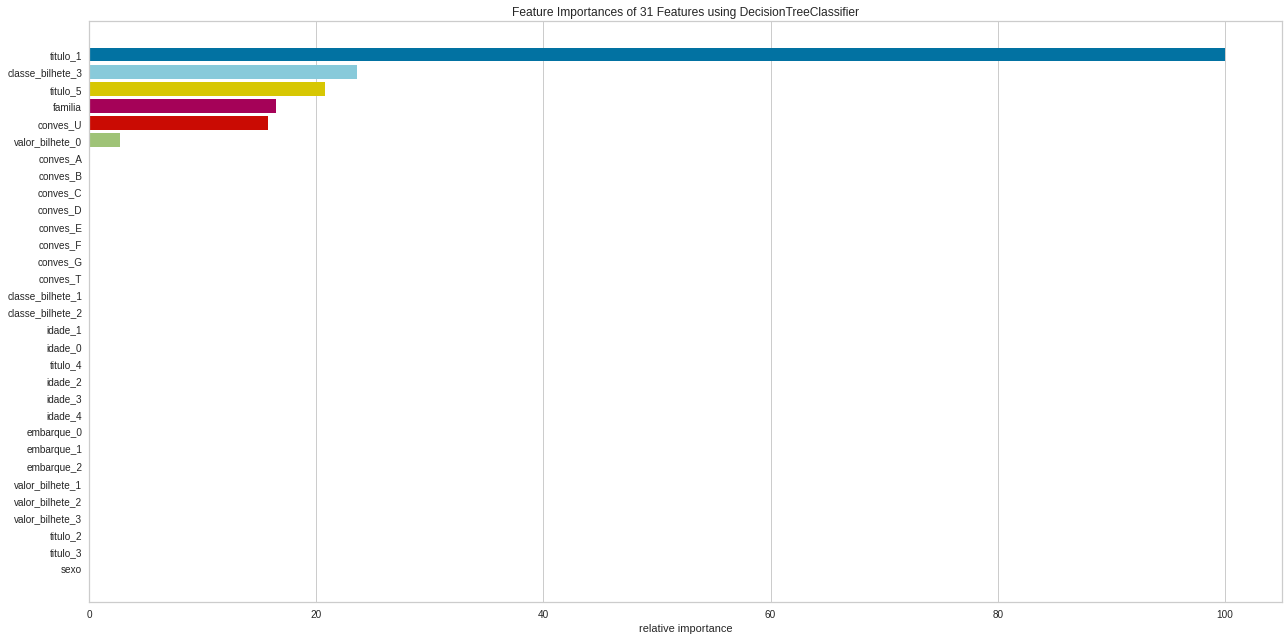

In [80]:
from yellowbrick.model_selection import FeatureImportances
fig, ax = plt.subplots(figsize=(18, 9))
fi_viz = FeatureImportances(modelo_tree)
fi_viz.fit(X_treino, y_teste)
fi_viz.poof()

Modelo CatBoost

In [81]:
#criando o modelo
modelo_catboost = CatBoostClassifier(depth=3,
                                     random_state=SEED)

modelo_catboost.fit(X_treino, y_teste)

y_pred_cat = modelo_catboost.predict(X_val)

#verificando a acurácia do modelo
acuracia_cat = round(accuracy_score(y_val, y_pred_cat)*100, 2)

display(f"A acurácia do modelo de Gradiente é de {acuracia_cat} %")

#Submetendo ao Kaggle
submissao_pred_cat = modelo_catboost.predict(X_teste)

submissao_cat = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                  'Survived': submissao_pred_cat
                                })
#Gerando arquivo csv
#submissao_cat.to_csv('./submission_cat.csv', index=False)

#Tabela de comparação
comparar('Cat Boost', acuracia_cat)

Learning rate set to 0.008417
0:	learn: 0.6874486	total: 46.4ms	remaining: 46.4s
1:	learn: 0.6824312	total: 47.3ms	remaining: 23.6s
2:	learn: 0.6778964	total: 47.9ms	remaining: 15.9s
3:	learn: 0.6745271	total: 48.6ms	remaining: 12.1s
4:	learn: 0.6706732	total: 49.2ms	remaining: 9.79s
5:	learn: 0.6659221	total: 49.8ms	remaining: 8.25s
6:	learn: 0.6613119	total: 50.4ms	remaining: 7.15s
7:	learn: 0.6571595	total: 51ms	remaining: 6.32s
8:	learn: 0.6531663	total: 51.6ms	remaining: 5.68s
9:	learn: 0.6494953	total: 52.2ms	remaining: 5.17s
10:	learn: 0.6457602	total: 52.8ms	remaining: 4.74s
11:	learn: 0.6421221	total: 53.5ms	remaining: 4.4s
12:	learn: 0.6382850	total: 54ms	remaining: 4.1s
13:	learn: 0.6355957	total: 54.6ms	remaining: 3.84s
14:	learn: 0.6323520	total: 55.2ms	remaining: 3.63s
15:	learn: 0.6289138	total: 55.9ms	remaining: 3.44s
16:	learn: 0.6251389	total: 56.5ms	remaining: 3.27s
17:	learn: 0.6220483	total: 57.1ms	remaining: 3.11s
18:	learn: 0.6180775	total: 57.7ms	remaining: 2.98

'A acurácia do modelo de Gradiente é de 80.97 %'

,Modelo,Acurácia
0,Árvore de Decisão,81.72
1,Regressão Logística,81.34
2,Cat Boost,80.97


Modelo Gradient Boosting

In [82]:
#criando o modelo
modelo_gradient = GradientBoostingClassifier(max_depth=3,
                                             n_estimators=100,
                                             learning_rate=0.3,
                                             random_state=SEED)

modelo_gradient.fit(X_treino, y_teste)

#gerando as previsões
y_pred_gradient = modelo_gradient.predict(X_val)

#verificando a acurácia do modelo
acuracia_gradient = round(accuracy_score(y_val, y_pred_gradient)*100, 2)

display(f"A acurácia do modelo de Gradiente é de {acuracia_gradient} %")

#Submetendo ao Kaggle
submissao_pred_gradient = modelo_gradient.predict(X_teste)

submissao_gradient = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                      'Survived': submissao_pred_gradient
                                  })

#Gerando arquivo csv
#submissao_gradient.to_csv('./submissao_gradient.csv', index=False)

#Tabela de comparação
comparar("Gradient Boosting", acuracia_gradient)

'A acurácia do modelo de Gradiente é de 81.34 %'

,Modelo,Acurácia
0,Árvore de Decisão,81.72
1,Regressão Logística,81.34
3,Gradient Boosting,81.34
2,Cat Boost,80.97


Modelo Random Forest Classifier

In [83]:
#Criando o Modelo
modelo_random_forest = RandomForestClassifier(min_samples_leaf=1,
                                              min_samples_split=5,
                                              n_estimators=21,
                                              max_depth=3, # profundidade da árvore
                                              max_features='auto',   
                                              criterion='entropy',
                                              random_state=SEED)
modelo_random_forest.fit(X_treino, y_teste)

#Gerando as previsões
y_pred_random_forest = modelo_random_forest.predict(X_val)


#Verificando a acurácia do modelo
acuracia_random_forest = round(accuracy_score(y_val, y_pred_random_forest)*100, 2)

display(f"A acurácia do modelo Random Forest é de {acuracia_random_forest} %")

#Submetendo ao Kaggle
submissao_pred_radom_forest = modelo_random_forest.predict(X_teste)

submissao_random_forest = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                           'Survived': submissao_pred_radom_forest
                                        })

#Gerando arquivo csv
#submissao_random_forest.to_csv('./submissao_random_forest.csv', index=False)

#Tabela de comparação
comparar("Random Forest Classifier", acuracia_random_forest)

'A acurácia do modelo Random Forest é de 80.97 %'

,Modelo,Acurácia
0,Árvore de Decisão,81.72
1,Regressão Logística,81.34
2,Gradient Boosting,81.34
3,Cat Boost,80.97
4,Random Forest Classifier,80.97


Modelo XGBoost Classifier

In [110]:
#Criando o Modelo
modelo_xgb = XGBClassifier(max_depth=3, 
                           min_child_weight=1, 
                           n_estimators=100,
                           n_jobs=1,
                           early_stopping_rounds=100, 
                           random_state=SEED, 
                           learning_rate=0.01,  
                           eval_metric=["error", "logloss"])

modelo_xgb.fit(X_treino, y_teste)

#Gerando as previsões
y_pred_xgb = modelo_xgb.predict(X_val)

#Verificando a acurácia do modelo
acuracia_xgb = round(accuracy_score(y_val, y_pred_xgb)*100, 2)

display(f"A acurácia do modelo XGB  é de {acuracia_xgb} %")

#Submetendo ao Kaggle
submissao_pred_xgb = modelo_xgb.predict(X_teste)

#submissao_xgb = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                 'Survived': submissao_pred_xgb
                              })

#Gerando arquivo csv
submissao_xgb.to_csv('./submissao_xgb.csv', index=False)

#Tabela de comparação
comparar('XGB Classifier',acuracia_xgb)

'A acurácia do modelo XGB  é de 81.72 %'

,Modelo,Acurácia
0,SVC,82.46
1,Árvore de Decisão,81.72
2,XGB Classifier,81.72
3,Regressão Logística,81.34
4,Gradient Boosting,81.34
5,Cat Boost,80.97
6,Random Forest Classifier,80.97
7,KNeighbors Classifier,79.85
8,SGD,78.73
9,GNB,76.12


<function matplotlib.pyplot.show>

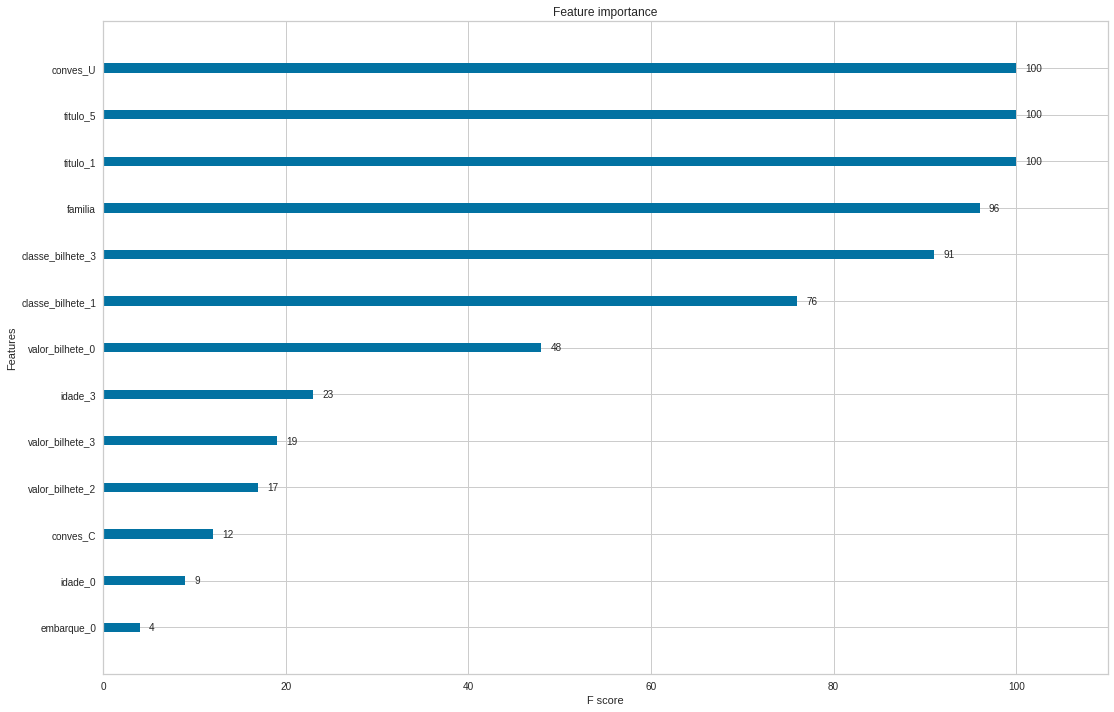

In [85]:
from xgboost import plot_importance
fig, ax1 = plt.subplots(figsize=(18, 12))
plot_importance(modelo_xgb, ax=ax1)
plt.show

Modelo SVC

In [109]:
#criando o Modelo
modelo_svc = SVC(C=1,
                 kernel='poly',
                 probability=True,
                 cache_size=200,
                 random_state=SEED)

modelo_svc.fit(X_treino, y_teste)

#gerando as previsões
y_pred_svc = modelo_svc.predict(X_val)

#verificando a acurácia do modelo
acuracia_svc = round(accuracy_score(y_val, y_pred_svc)*100, 2)

display(f"A acurácia do modelo SVC  é de {acuracia_svc} %")

#Submetendo ao Kaggle
submissao_pred_svc = modelo_svc.predict(X_teste)

submissao_svc = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                 'Survived': submissao_pred_svc
})

#Gerando arquivo csv
#submissao_svc.to_csv('./submissao_svc.csv', index=False)

#Tabela de comparação 
comparar('SVC', acuracia_svc)

'A acurácia do modelo SVC  é de 82.46 %'

,Modelo,Acurácia
0,SVC,82.46
1,Árvore de Decisão,81.72
2,XGB Classifier,81.72
3,Regressão Logística,81.34
4,Gradient Boosting,81.34
5,Cat Boost,80.97
6,Random Forest Classifier,80.97
7,KNeighbors Classifier,79.85
8,SGD,78.73
9,GNB,76.12


Modelo KNN

In [87]:
#Criando o modelo
modelo_knn = KNeighborsClassifier(n_neighbors=5,
                                  n_jobs=1,
                                  algorithm='auto')

modelo_knn.fit(X_treino, y_teste)

#Gerando as previsões
y_pred_knn = modelo_knn.predict(X_val)

#Verificando a acurácia do modelo
acuracia_knn = round(accuracy_score(y_val, y_pred_knn)*100, 2)

display(f"A acurácia do modelo KNeighborsClassifier  é de {acuracia_knn} %")

#Submetendo ao Kaggle
submissao_pred_knn = modelo_knn.predict(X_teste)

submissao_knn = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                 'Survived': submissao_pred_knn
                              })

#Gerando arquivo csv
#submissao_knn.to_csv('./submissao_knn.csv', index=False)

#Tabela de comparação
comparar('KNeighbors Classifier', acuracia_knn)

'A acurácia do modelo KNeighborsClassifier  é de 79.85 %'

,Modelo,Acurácia
0,SVC,82.46
1,Árvore de Decisão,81.72
2,XGB Classifier,81.72
3,Regressão Logística,81.34
4,Gradient Boosting,81.34
5,Cat Boost,80.97
6,Random Forest Classifier,80.97
7,KNeighbors Classifier,79.85


Modelo Stochastic Gradient Descent (SGD)

In [88]:
#Criando o modelo
modelo_sgd = linear_model.SGDClassifier(max_iter=1000,
                                        tol=None,
                                        random_state = SEED)

modelo_sgd.fit(X_treino, y_teste)

#Gerando as previsões
y_pred_sgd = modelo_sgd.predict(X_val)

#Verificando a acurácia do modelo
acuracia_sgd = round(accuracy_score(y_val, y_pred_sgd)*100, 2)

display(f"A acurácia do modelo Stochastic Gradiente Descent  é de {acuracia_sgd} %")

#Submetendo ao Kaggle
submissao_pred_sgd = modelo_sgd.predict(X_teste)

submissao_sgd = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                 'Survived': submissao_pred_sgd
                              })

#Gerando arquivo csv
#submissao_sgd.to_csv('./submissao_sgd.csv', index=False)

#Tabela de comparação
comparar('SGD', acuracia_sgd)

'A acurácia do modelo Stochastic Gradiente Descent  é de 78.73 %'

,Modelo,Acurácia
0,SVC,82.46
1,Árvore de Decisão,81.72
2,XGB Classifier,81.72
3,Regressão Logística,81.34
4,Gradient Boosting,81.34
5,Cat Boost,80.97
6,Random Forest Classifier,80.97
7,KNeighbors Classifier,79.85
8,SGD,78.73


Modelo Gaussian Naive Bayes

In [89]:
#Criando o modelo
modelo_gnb = GaussianNB()
modelo_gnb.fit(X_treino, y_teste)

#Gerando as previsões
y_pred_gnb = modelo_gnb.predict(X_val)

#Verificando a acurácia do modelo
acuracia_gnb = round(accuracy_score(y_val, y_pred_gnb)*100, 2)

display(f"A acurácia do modelo Gaussian Naive Bayes é de {acuracia_gnb} %")

#Submetendo ao Kaggle
submissao_pred_gnb = modelo_gnb.predict(X_teste)

submissao_gnb = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                 'Survived': submissao_pred_gnb
                              })

#Gerando arquivo csv
#submissao_gnb.to_csv('./submissao_gnb.csv', index=False)

#Tabela de comparação
comparar('GNB', acuracia_gnb)

'A acurácia do modelo Gaussian Naive Bayes é de 76.12 %'

,Modelo,Acurácia
0,SVC,82.46
1,Árvore de Decisão,81.72
2,XGB Classifier,81.72
3,Regressão Logística,81.34
4,Gradient Boosting,81.34
5,Cat Boost,80.97
6,Random Forest Classifier,80.97
7,KNeighbors Classifier,79.85
8,SGD,78.73
9,GNB,76.12


Modelo Perceptron

In [90]:
#Criando o modelo
modelo_per = Perceptron(max_iter=1000,
                        random_state=SEED)

modelo_per.fit(X_treino, y_teste)

#Gerando as previsões
y_pred_per = modelo_per.predict(X_val)

#Verificando a acurácia do modelo
acuracia_per = round(accuracy_score(y_val, y_pred_per)*100, 2)

display(f"A acurácia do modelo Perceptron é de {acuracia_per} %")

#Submetendo ao Kaggle
submissao_pred_per = modelo_per.predict(X_teste)

submissao_per = pd.DataFrame({'PassengerId': teste_df['id_passageiro'],
                                 'Survived': submissao_pred_per
                              })

#Gerando arquivo csv
#submissao_per.to_csv('./submissao_per.csv', index=False)

#Tabela de comparação
comparar('Perceptron', acuracia_per)

'A acurácia do modelo Perceptron é de 76.12 %'

,Modelo,Acurácia
0,SVC,82.46
1,Árvore de Decisão,81.72
2,XGB Classifier,81.72
3,Regressão Logística,81.34
4,Gradient Boosting,81.34
5,Cat Boost,80.97
6,Random Forest Classifier,80.97
7,KNeighbors Classifier,79.85
8,SGD,78.73
9,GNB,76.12


# COMPARANDO OS 3 MELHORES MODELOS

In [91]:
tres_modelos = comparar_modelos[:3].copy()
tres_modelos

,Modelo,Acurácia
0,SVC,82.46
1,Árvore de Decisão,81.72
2,XGB Classifier,81.72


MATRIX DE CONFUSÃO 

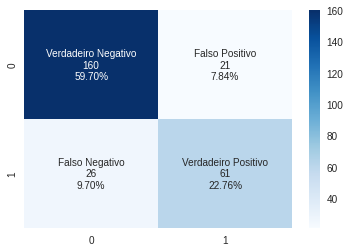

In [92]:
from sklearn.metrics import confusion_matrix 

# Usamos os mesmos dados de treino para previsão e calculamos a matriz de confusão
# Configurando o gráfico para o SVC
svc_predict = modelo_svc.predict(X_val)
svc_matrix = confusion_matrix(y_val, svc_predict)

#Será impresso no gráfico

classificacao = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']

contagem_svc = ["{0:0.0f}".format(value) for value in svc_matrix.flatten()] # lista de compreensão que irá gerar uma lista da Matriz de confusão.

percentual_svc = ["{0:.2%}".format(value) for value in svc_matrix.flatten()/np.sum(svc_matrix)] # lista de compreensão que irá gerar uma lista com as % da Matriz de confusão.

labels_svc = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(classificacao,contagem_svc, percentual_svc)] #reúne as informações acima 

labels_svc = np.asarray(labels_svc).reshape(2,2) # remodela o array unidimendional em um 2x2 que será impresso em cada quadrante da Matriz de Confusão

sns.heatmap(svc_matrix, annot=labels_svc, fmt="", cmap='Blues')

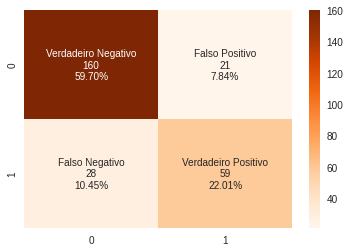

In [93]:
# Configurando o gráfico para o modelo Árvore de Decisão
tree_predict = modelo_tree.predict(X_val)
tree_matrix = confusion_matrix(y_val, tree_predict)


classificacao = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']

contagem_tree = ["{0:0.0f}".format(value) for value in tree_matrix.flatten()] # lista de compreensão que irá gerar uma lista da Matriz de confusão.

percentual_tree = ["{0:.2%}".format(value) for value in tree_matrix.flatten()/np.sum(tree_matrix)] # lista de compreensão que irá gerar uma lista com as % da Matriz de confusão.

labels_tree = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(classificacao,contagem_tree,percentual_tree)] #reúne as informações acima

labels_tree = np.asarray(labels_tree).reshape(2,2)  # remodela o array unidimendional em um 2x2 que será impresso em cada quadrante da Matriz de Confusão

sns.heatmap(tree_matrix, annot=labels_tree, fmt="", cmap='Oranges')

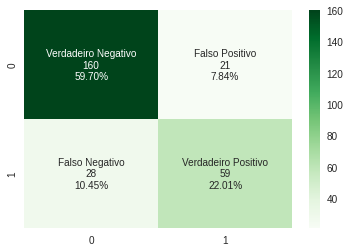

In [94]:
# Configurando o gráfico para o modelo Gradient boost
xgb_predict = modelo_xgb.predict(X_val)
xgb_matrix = confusion_matrix(y_val, xgb_predict)


classificacao = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']

contagem_xgb = ["{0:0.0f}".format(value) for value in xgb_matrix.flatten()] # lista de compreensão que irá gerar uma lista da Matriz de confusão.

percentual_xgb = ["{0:.2%}".format(value) for value in xgb_matrix.flatten()/np.sum(xgb_matrix)] # lista de compreensão que irá gerar uma lista com as % da Matriz de confusão.

labels_xgb = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(classificacao,contagem_xgb,percentual_xgb)] #reúne as informações acima

labels_xgb = np.asarray(labels_xgb).reshape(2,2)  # remodela o array unidimendional em um 2x2 que será impresso em cada quadrante da Matriz de Confusão


sns.heatmap(xgb_matrix, annot=labels_xgb, fmt="", cmap='Greens')

Text(1188.7058823529412, 0.5, 'Real')

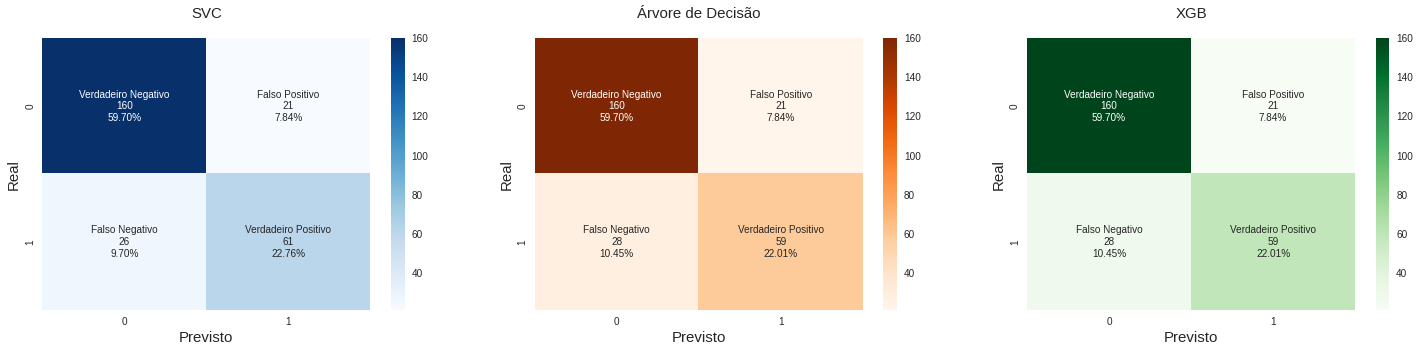

In [95]:
#colocando os gráficos lado a lado para facilitar a comparação
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(25,5))

#matrix de confusão da Árvore de Decisão
ax = sns.heatmap(svc_matrix, annot=labels_svc, fmt="", cmap='Blues', ax=axis1)
ax.set_title('SVC', fontsize=15,pad=20)
ax.set_xlabel('Previsto', fontsize= 15)
ax.set_ylabel('Real', fontsize=15)

# #matrix de confusão do SVC
ax = sns.heatmap(tree_matrix, annot=labels_tree, fmt="", cmap='Oranges', ax=axis2)
ax.set_title('Árvore de Decisão', fontsize=15,pad=20)
ax.set_xlabel('Previsto', fontsize= 15)
ax.set_ylabel('Real', fontsize=15)

#matrix de confusão da Árvore de Decisão
ax = sns.heatmap(xgb_matrix, annot=labels_xgb, fmt="", cmap='Greens', ax=axis3)
ax.set_title('XGB', fontsize=15,pad=20)
ax.set_xlabel('Previsto', fontsize= 15)
ax.set_ylabel('Real', fontsize=15)

PRECISÃO

In [96]:
from sklearn.metrics import precision_score
#lista dos valores preditos respeitando a ordem  dos tres_modelos para inserir numa coluna e compararmos.
lista_val_predict = [svc_predict, tree_predict, xgb_predict]

In [97]:
tres_modelos['Precisão'] = [(precision_score(y_val, x)*100).round(2) for x in lista_val_predict]
tres_modelos

,Modelo,Acurácia,Precisão
0,SVC,82.46,74.39
1,Árvore de Decisão,81.72,73.75
2,XGB Classifier,81.72,73.75


RECALL

In [98]:
from sklearn.metrics import recall_score

tres_modelos['Recall']=[(recall_score(y_val, x)*100).round(2) for x in lista_val_predict]
tres_modelos

,Modelo,Acurácia,Precisão,Recall
0,SVC,82.46,74.39,70.11
1,Árvore de Decisão,81.72,73.75,67.82
2,XGB Classifier,81.72,73.75,67.82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDi

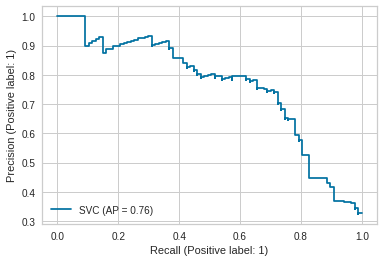

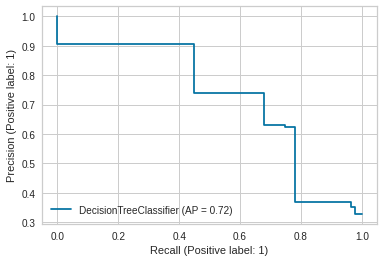

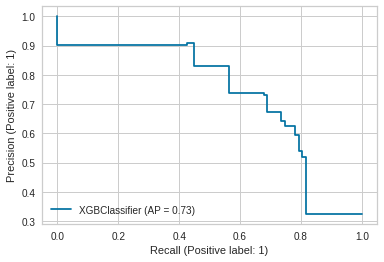

In [99]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(modelo_svc, X_val, y_val)
plot_precision_recall_curve(modelo_tree, X_val, y_val)
plot_precision_recall_curve(modelo_xgb, X_val, y_val)

F1 - SCORE

In [100]:
from sklearn.metrics import f1_score
tres_modelos['F1-Score'] = [(f1_score(y_val,  x)*100).round(2) for x in lista_val_predict]
tres_modelos

,Modelo,Acurácia,Precisão,Recall,F1-Score
0,SVC,82.46,74.39,70.11,72.19
1,Árvore de Decisão,81.72,73.75,67.82,70.66
2,XGB Classifier,81.72,73.75,67.82,70.66


CLASSIFICAÇÃO REPORT

In [101]:
from sklearn.metrics import classification_report

In [102]:
#Individualmente
#y_true = y_treino
#y_pred = svc_predict
#target_names = ['Não Sobreviventes', 'Sobreviventes']
#print(classification_report(y_true, y_pred, target_names=target_names))

In [103]:
#Gerando os relatórios para os 3 modelos ao mesmo tempo
lista_val_predict =[svc_predict, tree_predict, xgb_predict] 
[print(classification_report(y_val, x, target_names=['Não Sobrevivente','Sobrevivente'])) for x in lista_val_predict]

                  precision    recall  f1-score   support

Não Sobrevivente       0.86      0.88      0.87       181
    Sobrevivente       0.74      0.70      0.72        87

        accuracy                           0.82       268
       macro avg       0.80      0.79      0.80       268
    weighted avg       0.82      0.82      0.82       268

                  precision    recall  f1-score   support

Não Sobrevivente       0.85      0.88      0.87       181
    Sobrevivente       0.74      0.68      0.71        87

        accuracy                           0.82       268
       macro avg       0.79      0.78      0.79       268
    weighted avg       0.81      0.82      0.82       268

                  precision    recall  f1-score   support

Não Sobrevivente       0.85      0.88      0.87       181
    Sobrevivente       0.74      0.68      0.71        87

        accuracy                           0.82       268
       macro avg       0.79      0.78      0.79       268
    we

[None, None, None]

CURVA ROC

In [104]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` 

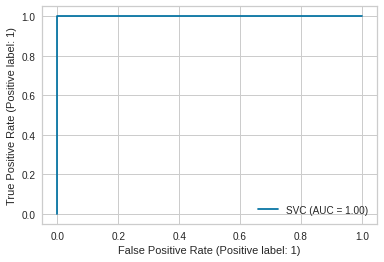

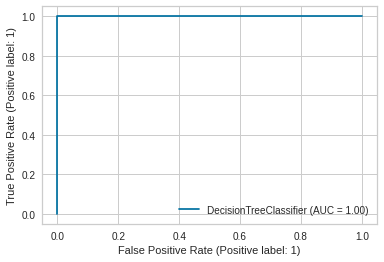

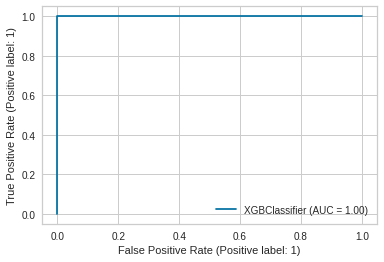

In [105]:
plot_roc_curve(modelo_svc, X_val, svc_predict)
plot_roc_curve(modelo_tree, X_val, tree_predict)
plot_roc_curve(modelo_xgb, X_val, xgb_predict)

# VALIDAÇÃO DE DADOS

CROSS VALIDATION

In [106]:
#Para verificar o grau de confiança das métricas ultilizadas nos modelos,
#Vamos fazer a etapada de validação com o 'cross validation', só assim podemos corrigir enviesamentos de overfitting.
from sklearn.model_selection import KFold, cross_val_score

lista_de_modelos = [modelo_svc, modelo_tree, modelo_xgb]
media = []
desv_pad = []
intervalo = []

In [107]:
def validacao_cruzada(lista_de_modelos):
  
  #n_splits é a quantidade de divisão que será feita nos dados e testado
  #shuffle prefere que embaralhe os dados na escolha dos n_splits

  kfold  = KFold(n_splits=10, shuffle=True, random_state=SEED)

  for x in lista_de_modelos:
    score = cross_val_score(x, X_treino, y_teste, cv=kfold, scoring='accuracy')
    #print((score*100).round(2),(score.mean()*100).round(2),(score.std()*100).round(2))
    media.append((score.mean()*100).round(2))
    desv_pad.append((score.std()*100).round(2))
    intervalo.append([(score.mean()*100).round(2) - (score.std()*100).round(2) , (score.mean()*100).round(2) + (score.std()*100).round(2)])


  tres_modelos["Acuracia-CV"]=media
  tres_modelos['Desvio Padrão-CV'] = desv_pad
  tres_modelos['Intervalo-CV'] =intervalo

In [108]:
validacao_cruzada(lista_de_modelos)
tres_modelos

,Modelo,Acurácia,Precisão,Recall,F1-Score,Acuracia-CV,Desvio Padrão-CV,Intervalo-CV
0,SVC,82.46,74.39,70.11,72.19,83.16,4.36,"[78.8, 87.52]"
1,Árvore de Decisão,81.72,73.75,67.82,70.66,82.19,4.88,"[77.31, 87.07]"
2,XGB Classifier,81.72,73.75,67.82,70.66,82.36,5.15,"[77.21, 87.51]"


# COMPARANDO COM OS RESULTADOS DO KAGGLE

In [112]:
svc = 0.77511

tree = 0.77511

xgb = 0.76794

tres_modelos['Resultado do Kaggle'] = [(svc*100), (tree*100), (xgb*100)]
tres_modelos.sort_values(ascending=False, by= 'Resultado do Kaggle', ignore_index=True)
tres_modelos

,Modelo,Acurácia,Precisão,Recall,F1-Score,Acuracia-CV,Desvio Padrão-CV,Intervalo-CV,Resultado do Kaggle
0,SVC,82.46,74.39,70.11,72.19,83.16,4.36,"[78.8, 87.52]",77.511
1,Árvore de Decisão,81.72,73.75,67.82,70.66,82.19,4.88,"[77.31, 87.07]",77.511
2,XGB Classifier,81.72,73.75,67.82,70.66,82.36,5.15,"[77.21, 87.51]",76.794
